# importing libraries and dataframing

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [154]:
data=pd.read_csv(r"C:\Users\Muhammad Fahad\Downloads\Position_Salaries.csv")

In [155]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [156]:
x = data.iloc[:,1:2].values
y = data.iloc[:,2:3].values

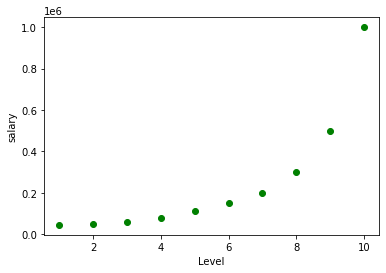

In [165]:
plt.scatter(x,y,color='green')
plt.xlabel('Level')
plt.ylabel('salary')
plt.show()

# training our model as polynomial regression with degree 04

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)

poly_reg.fit(x_poly,y)

lr_reg= LinearRegression()
lr_reg.fit(x_poly,y)


LinearRegression()

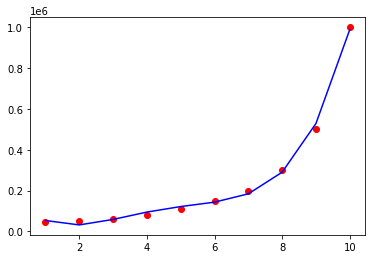

In [120]:
plt.scatter(x,y,color='red')
plt.plot(x, lr_reg.predict(poly_reg.fit_transform(x)),color='blue')
plt.show()

In [121]:
#cheking R-Square value of polynomial model

print('R sq: ', lr_reg.score(x_poly, y))

R sq:  0.9973922891706614


# training our model as a linear regression

In [123]:
lr_reg.fit(x,y)
y_pred=lr_reg.predict(x)

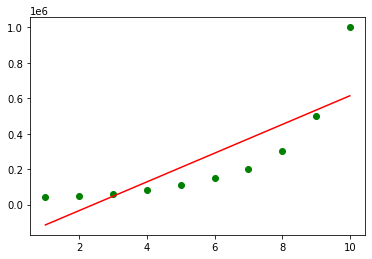

In [124]:
plt.scatter(x,y,color='green')
plt.plot(x,y_pred,color='red')

In [125]:
#cheking R-Square value of linear model
print('R sq: ', lr_reg.score(x, y))

R sq:  0.6690412331929895


# training our model as Support Vector Regression 

In [146]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()

In [147]:
X= sc_x.fit_transform(x)
Y= sc_y.fit_transform(y)

In [168]:
from sklearn.svm import SVR

In [169]:
S_reg= SVR(kernel='rbf')
S_reg.fit(X,Y)

C:\Users\Muhammad Fahad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## now plotting our model to check 

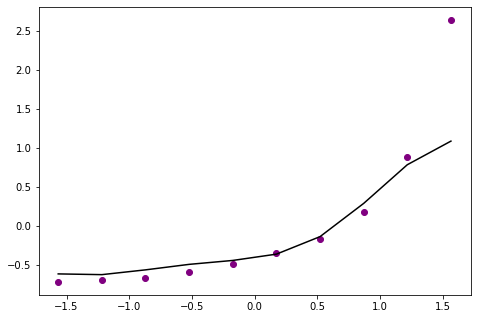

In [180]:
fig=plt.figure()
ax= fig.add_axes([0,0,1,1])
ax.scatter(X,Y,color='purple')
ax.plot(X,S_reg.predict(X),color='black')


## cheking the prediction accuracy of SVR model

In [182]:
y_pred=S_reg.predict(X)
print(y_pred/X)

[[ 0.3955995   0.40163872  0.36247548  0.31743325  0.28525161  0.23372204
   0.09009752 -0.18227918 -0.49930801 -0.69292059]
 [ 0.50862792  0.51639264  0.4660399   0.40812847  0.36675207  0.30049976
   0.11583967 -0.23435894 -0.64196744 -0.89089791]
 [ 0.71207909  0.72294969  0.65245586  0.57137986  0.51345289  0.42069966
   0.16217554 -0.32810252 -0.89875442 -1.24725707]
 [ 1.18679849  1.20491615  1.08742644  0.95229976  0.85575482  0.70116611
   0.27029256 -0.54683753 -1.49792403 -2.07876178]
 [ 3.56039546  3.61474845  3.26227932  2.85689929  2.56726447  2.10349832
   0.81087769 -1.64051258 -4.49377209 -6.23628535]
 [-3.56039546 -3.61474845 -3.26227932 -2.85689929 -2.56726447 -2.10349832
  -0.81087769  1.64051258  4.49377209  6.23628535]
 [-1.18679849 -1.20491615 -1.08742644 -0.95229976 -0.85575482 -0.70116611
  -0.27029256  0.54683753  1.49792403  2.07876178]
 [-0.71207909 -0.72294969 -0.65245586 -0.57137986 -0.51345289 -0.42069966
  -0.16217554  0.32810252  0.89875442  1.24725707]
